In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
repo_path = "/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset"
print("Content:",os.listdir(repo_path))


Content: ['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [ ]:
import glob
image_paths = []
labels = []
for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
       for img_file in os.listdir(class_folder):
           image_paths.append(os.path.join(class_folder,img_file))
           labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 1586


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1269 images belonging to 31 classes.
Found 315 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # 31 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,308,639 (12.62 MB)

 Trainable params: 3,308,639 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [ ]:
from PIL import Image, UnidentifiedImageError
import os

# Set dataset path
dataset_path = '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset'

# Walk through all directories
bad_files = []
for root, dirs, files in os.walk(dataset_path):
    # Skip .git or hidden/system folders
    if '.git' in root or '/.' in root:
        continue
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(root, file)
            try:
                # Try to open the image
                with Image.open(file_path) as img:
                    img.verify()  # verify it's not broken
            except (UnidentifiedImageError, OSError):
                bad_files.append(file_path)

# Delete bad images
for bad in bad_files:
    try:
        os.remove(bad)
        print(f"Deleted: {bad}")
    except Exception as e:
        print(f"Could not delete: {bad} — {e}")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Important: Enables train/val split
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1269 images belonging to 31 classes.
Found 315 images belonging to 31 classes.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset path
dataset_path = "/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset"

# Image size and training params
img_size = (128, 128)
batch_size = 32
epochs = 10

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)


Found 1269 images belonging to 31 classes.
Found 315 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Basic CNN Model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(train_generator, epochs=epochs, validation_data=val_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.0846 - loss: 3.4450 - val_accuracy: 0.0952 - val_loss: 3.3718
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 320ms/step - accuracy: 0.1187 - loss: 3.3283 - val_accuracy: 0.0952 - val_loss: 3.3086
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 328ms/step - accuracy: 0.0987 - loss: 3.2892 - val_accuracy: 0.1206 - val_loss: 3.2150
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 326ms/step - accuracy: 0.1232 - loss: 3.2233 - val_accuracy: 0.1302 - val_loss: 3.1753
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 328ms/step - accuracy: 0.1163 - loss: 3.1861 - val_accuracy: 0.1397 - val_loss: 3.1348
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 388ms/step - accuracy: 0.1401 - loss: 3.1201 - val_accuracy: 0.1460 - val_loss: 3.1101
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.1358 - loss: 3.1191 - val_accuracy: 0.1524 - val_loss: 3.0767
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 329ms/step - accuracy: 0.1289 - loss: 3.0941 - val_accurac

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# CNN with BatchNorm & Dropout
bn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

bn_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history_bn = bn_model.fit(train_generator, epochs=epochs, validation_data=val_generator)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 509ms/step - accuracy: 0.0403 - loss: 4.4834 - val_accuracy: 0.0317 - val_loss: 4.8144
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 337ms/step - accuracy: 0.0654 - loss: 3.3703 - val_accuracy: 0.0317 - val_loss: 7.2848
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 329ms/step - accuracy: 0.0986 - loss: 3.2892 - val_accuracy: 0.0317 - val_loss: 9.0379
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 374ms/step - accuracy: 0.0963 - loss: 3.2324 - val_accuracy: 0.0317 - val_loss: 9.2641
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 335ms/step - accuracy: 0.1066 - loss: 3.2429 - val_accuracy: 0.0381 - val_loss: 9.3690
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 331ms/step - accuracy: 0.1179 - loss: 3.1920 - val_accuracy: 0.0349 - val_loss: 9.5150
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 330ms/step - accuracy: 0.1211 - loss: 3.1661 - val_accuracy: 0.0476 - val_loss: 9.1903
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 329ms/step - accuracy: 0.1502 - loss: 3.0585 - val_accu

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
base_model.trainable = False  # Freeze layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

effnet_model = Model(inputs=base_model.input, outputs=output)

effnet_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history_effnet = effnet_model.fit(train_generator, epochs=epochs, validation_data=val_generator)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.0422 - loss: 3.4449 - val_accuracy: 0.0952 - val_loss: 3.3909
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 326ms/step - accuracy: 0.0909 - loss: 3.3939 - val_accuracy: 0.0952 - val_loss: 3.3807
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - accuracy: 0.0952 - loss: 3.3796 - val_accuracy: 0.0952 - val_loss: 3.3754
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 325ms/step - accuracy: 0.0829 - loss: 3.3868 - val_accuracy: 0.0952 - val_loss: 3.3721
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 329ms/step - accuracy: 0.0774 - loss: 3.3941 - val_accuracy: 0.0952 - val_loss: 3.3708
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.1001 - loss: 3.3639 - val_accuracy: 0.0952 - val_loss: 3.3688
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 326ms/step - accuracy: 0.0950 - loss: 3.3677 - val_accuracy: 0.0952 - val_loss: 3.3673
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 329ms/s

In [ ]:
print("Best Training Accuracies:")
print(f"Basic CNN: {max(history_cnn.history['accuracy'])*100:.2f}%")
print(f"CNN + BatchNorm: {max(history_bn.history['accuracy'])*100:.2f}%")
print(f"EfficientNet: {max(history_effnet.history['accuracy'])*100:.2f}%")

print("\nBest Validation Accuracies:")
print(f"Basic CNN: {max(history_cnn.history['val_accuracy'])*100:.2f}%")
print(f"CNN + BatchNorm: {max(history_bn.history['val_accuracy'])*100:.2f}%")
print(f"EfficientNet: {max(history_effnet.history['val_accuracy'])*100:.2f}%")


Best Training Accuracies:
Basic CNN: 16.08%
CNN + BatchNorm: 15.21%
EfficientNet: 9.46%

Best Validation Accuracies:
Basic CNN: 16.19%
CNN + BatchNorm: 13.97%
EfficientNet: 9.52%


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.0488 - loss: 3.4167
Validation Accuracy: 9.52%
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 906ms/step


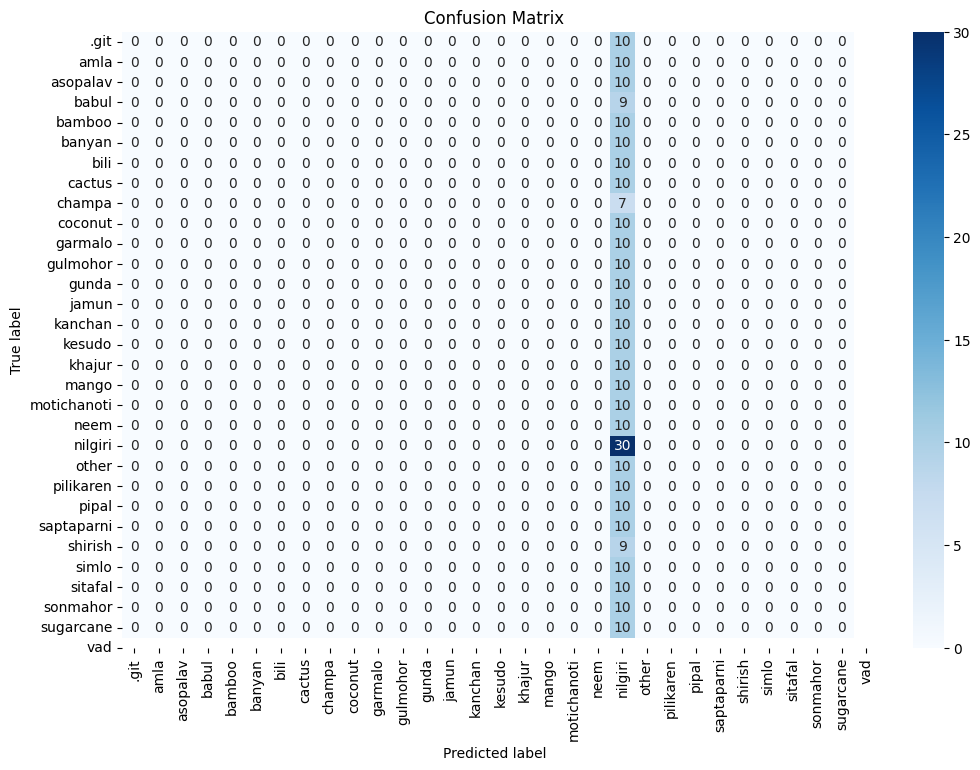

Classification Report:
               precision    recall  f1-score   support

        .git       0.00      0.00      0.00         0
        amla       0.00      0.00      0.00        10
    asopalav       0.00      0.00      0.00        10
       babul       0.00      0.00      0.00        10
      bamboo       0.00      0.00      0.00         9
      banyan       0.00      0.00      0.00        10
        bili       0.00      0.00      0.00        10
      cactus       0.00      0.00      0.00        10
      champa       0.00      0.00      0.00        10
     coconut       0.00      0.00      0.00         7
     garmalo       0.00      0.00      0.00        10
    gulmohor       0.00      0.00      0.00        10
       gunda       0.00      0.00      0.00        10
       jamun       0.00      0.00      0.00        10
     kanchan       0.00      0.00      0.00        10
      kesudo       0.00      0.00      0.00        10
      khajur       0.00      0.00      0.00        10
   

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

best_model = effnet_model  # Change if needed

# Evaluate
val_loss, val_acc = best_model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Predictions
y_pred = best_model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Get class labels in correct order
class_labels = list(val_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Classification Report - FIXED
labels = list(range(len(class_labels)))  # indices 0 to n_classes-1
print("Classification Report:\n", classification_report(
    y_true, y_pred_classes, labels=labels, target_names=class_labels, zero_division=0
))


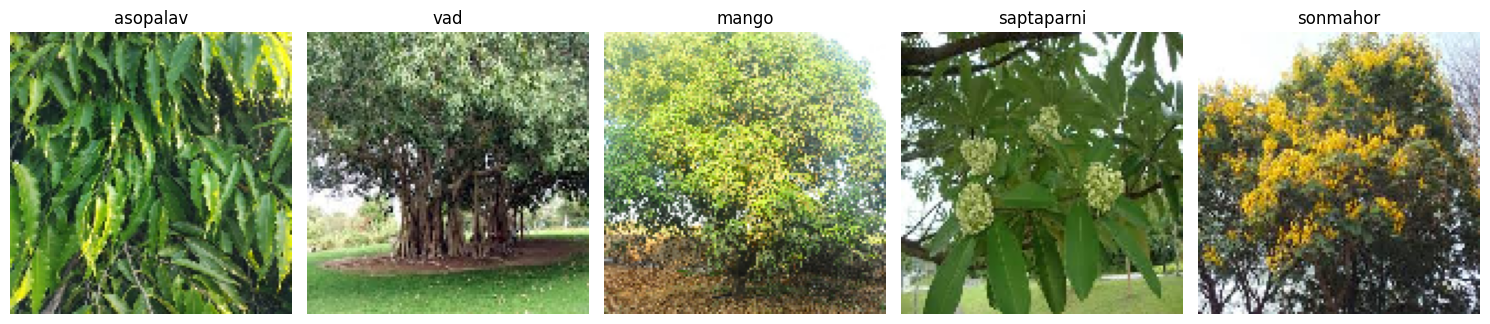

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import random

# Set the dataset path
dataset_path = '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset'

# Get all valid class folders (ignore hidden/system folders like .git)
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')]

# Display 1 image from 5 random classes
plt.figure(figsize=(15, 5))
for i, class_name in enumerate(random.sample(class_names, 5)):
    class_folder = os.path.join(dataset_path, class_name)
    img_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not img_files:
        continue  # skip if no image files

    img_path = os.path.join(class_folder, img_files[0])
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img).astype("uint8")

    plt.subplot(1, 5, i + 1)
    plt.imshow(img_array.astype("uint8"))
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


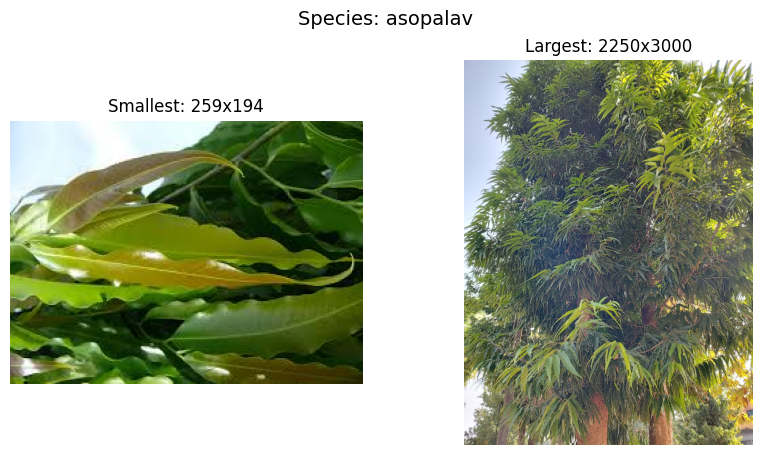

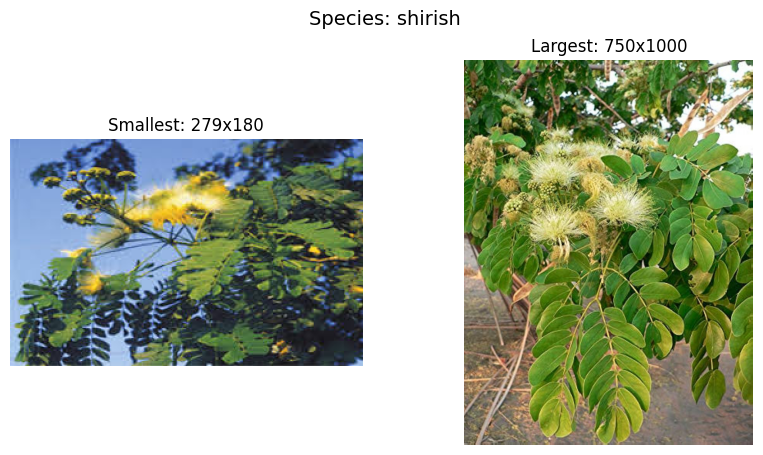

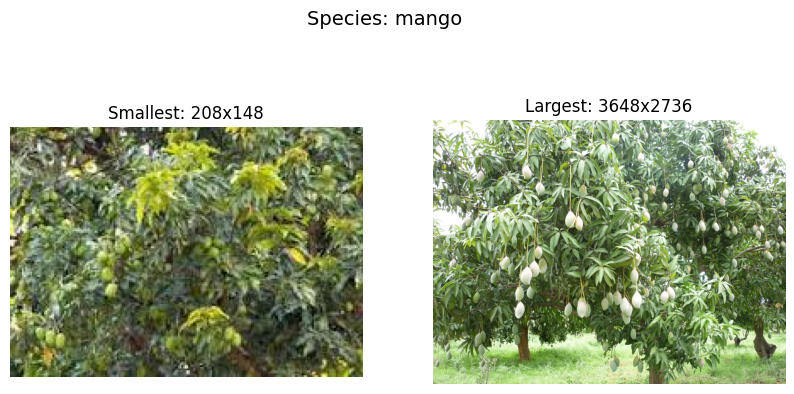

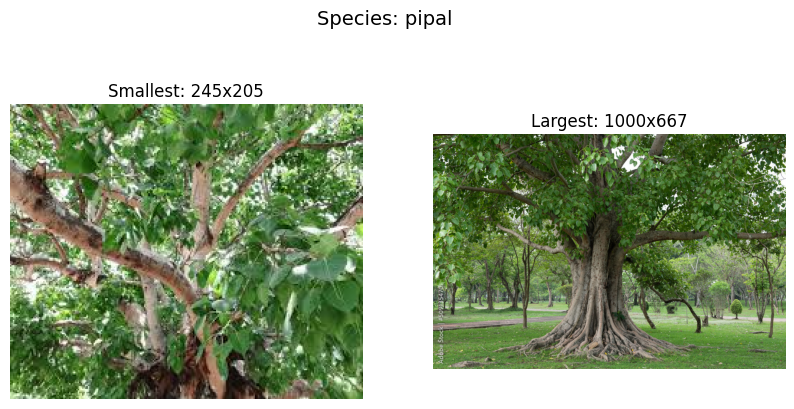

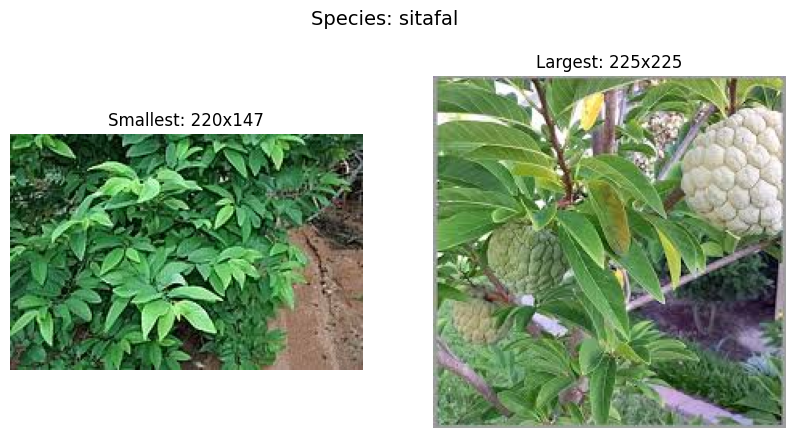

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Dataset path
dataset_path = '/content/drive/MyDrive/Tree Classification/Tree_Species_Dataset'

# Get only valid image folders (ignore .git and hidden/system folders)
class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and not d.startswith('.')]

# Pick 5 random species
selected_species = random.sample(class_names, 5)

for species in selected_species:
    species_path = os.path.join(dataset_path, species)
    image_files = [f for f in os.listdir(species_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    image_paths = []
    dimensions = []

    for f in image_files:
        path = os.path.join(species_path, f)
        try:
            with Image.open(path) as img:
                dimensions.append(img.size)  # (width, height)
                image_paths.append(path)
        except:
            continue

    if dimensions:
        # Get smallest and largest by area
        areas = [w * h for (w, h) in dimensions]
        smallest_idx = areas.index(min(areas))
        largest_idx = areas.index(max(areas))

        # Display both
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f"Species: {species}", fontsize=14)

        # Smallest
        smallest_img = Image.open(image_paths[smallest_idx])
        axs[0].imshow(smallest_img)
        axs[0].set_title(f"Smallest: {dimensions[smallest_idx][0]}x{dimensions[smallest_idx][1]}")
        axs[0].axis('off')

        # Largest
        largest_img = Image.open(image_paths[largest_idx])
        axs[1].imshow(largest_img)
        axs[1].set_title(f"Largest: {dimensions[largest_idx][0]}x{dimensions[largest_idx][1]}")
        axs[1].axis('off')

        plt.show()
    else:
        print(f"\nSpecies: {species}")
        print("No valid images found.")


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 396ms/step - accuracy: 0.0925 - loss: 3.4042 - val_accuracy: 0.1270 - val_loss: 3.1222
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step - accuracy: 0.1309 - loss: 3.0778 - val_accuracy: 0.1841 - val_loss: 2.8747
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 324ms/step - accuracy: 0.1801 - loss: 2.9049 - val_accuracy: 0.2381 - val_loss: 2.7264
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 320ms/step - accuracy: 0.2411 - loss: 2.6654 - val_accuracy: 0.2349 - val_loss: 2.6634
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 318ms/step - accuracy: 0.2462 - loss: 2.5997 - val_accuracy: 0.2603 - val_loss: 2.5593
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - accuracy: 0.2986 - loss: 2.4092 - val_accuracy: 0.2667 - val_loss: 2.5550
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 315ms/step - accuracy: 0.2903 - loss: 2.3946 - val_accuracy: 0.2857 - val_loss: 2.4747
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 314ms/step - accuracy: 0.3865 - loss: 2.1299 - val_accu

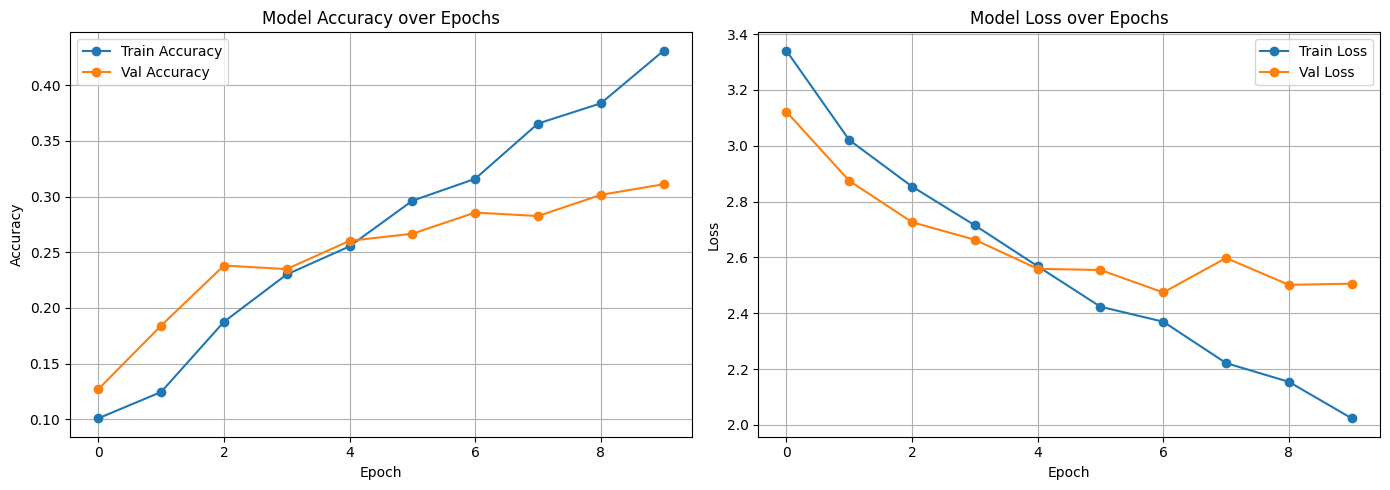

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate model using validation data (already split during training)
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")



10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 381ms/step - accuracy: 0.2622 - loss: 2.5757
Validation Accuracy: 28.57%


In [ ]:
# Save the trained model as .h5 file
model.save("Tree_Species_Classification_Model.h5")


In [ ]:
from google.colab import files
files.download("Tree_Species_Classification_Model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip Tree_Species_Classification_Model.zip Tree_Species_Classification_Model.h5


  adding: Tree_Species_Classification_Model.h5 (deflated 12%)


In [ ]:
from google.colab import files
files.download("Tree_Species_Classification_Model.zip")


In [ ]:
!ls -lh


total 72M
drwx------ 6 root root 4.0K Aug  1 11:03 drive
drwxr-xr-x 1 root root 4.0K Jul 30 13:39 sample_data
-rw-r--r-- 1 root root  38M Aug  1 11:40 Tree_Species_Classification_Model.h5
-rw-r--r-- 1 root root  34M Aug  1 11:42 Tree_Species_Classification_Model.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')